In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('final_clean_data_201501_shortest.csv', index_col=0)
print ("Shape of data\n{}".format(df.shape))
df.head()

Shape of data
(124533, 29)


,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,hour,dayofweek,dayofyear,timerange,day_and_hour,...,snowfall,snow_depth,temperature_max,temperature_min,fastest_2minute_windspeed,fog,heavy_fog,ice_pellets,smoke_haze,EVENT_TYPE
2192450,1,-73.872955,40.773956,-74.000648,40.739120,18,Monday,5,1583,518,...,0.0,0.0,49.0,21.0,23.9,0.0,0.0,0.0,0.0,-1
2310230,1,-73.982193,40.771347,-73.981712,40.740631,15,Saturday,3,683,315,...,0.0,0.0,42.0,33.0,12.1,1.0,0.0,0.0,1.0,-1
8416465,1,-73.960800,40.778404,-73.962158,40.763882,15,Wednesday,28,1413,2815,...,0.0,8.0,34.0,16.0,16.1,0.0,0.0,0.0,0.0,-1
7531245,1,-73.994743,40.721054,-73.984894,40.736752,2,Friday,30,393,302,...,1.0,7.0,38.0,19.0,21.9,1.0,0.0,0.0,1.0,-1
7565772,3,-74.010300,40.720509,-73.971458,40.761696,9,Friday,30,2719,309,...,1.0,7.0,38.0,19.0,21.9,1.0,0.0,0.0,1.0,-1


In [3]:
df.reset_index(drop=True, inplace=True)
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,hour,dayofweek,dayofyear,timerange,day_and_hour,...,snowfall,snow_depth,temperature_max,temperature_min,fastest_2minute_windspeed,fog,heavy_fog,ice_pellets,smoke_haze,EVENT_TYPE
0,1,-73.872955,40.773956,-74.000648,40.739120,18,Monday,5,1583,518,...,0.0,0.0,49.0,21.0,23.9,0.0,0.0,0.0,0.0,-1
1,1,-73.982193,40.771347,-73.981712,40.740631,15,Saturday,3,683,315,...,0.0,0.0,42.0,33.0,12.1,1.0,0.0,0.0,1.0,-1
2,1,-73.960800,40.778404,-73.962158,40.763882,15,Wednesday,28,1413,2815,...,0.0,8.0,34.0,16.0,16.1,0.0,0.0,0.0,0.0,-1
3,1,-73.994743,40.721054,-73.984894,40.736752,2,Friday,30,393,302,...,1.0,7.0,38.0,19.0,21.9,1.0,0.0,0.0,1.0,-1
4,3,-74.010300,40.720509,-73.971458,40.761696,9,Friday,30,2719,309,...,1.0,7.0,38.0,19.0,21.9,1.0,0.0,0.0,1.0,-1


In [4]:
df.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'hour', 'dayofweek',
       'dayofyear', 'timerange', 'day_and_hour', 'geohash_pickup',
       'geohash_dropoff', 'airport_as_destination', 'FHV_count', 'DATE',
       'DAILYSunrise', 'DAILYSunset', 'wind_speed_average', 'precipitation',
       'snowfall', 'snow_depth', 'temperature_max', 'temperature_min',
       'fastest_2minute_windspeed', 'fog', 'heavy_fog', 'ice_pellets',
       'smoke_haze', 'EVENT_TYPE'],
      dtype='object')

## PCA

In [5]:
y = df.loc[:,'airport_as_destination']

In [6]:
df['geohash_factorize'] = pd.factorize(df['geohash_pickup'])[0]
df['dayofweek'] = pd.factorize(df['dayofweek'])[0]

In [7]:
X = df[['timerange', 'day_and_hour', 'FHV_count', 'geohash_factorize', 'DAILYSunrise', 'wind_speed_average',
       'snow_depth', 'temperature_min']]

In [8]:
print (X.shape, len(y))

(124533, 8) 124533


[  7.11562647e-01   2.04193076e-01   8.39101701e-02   3.14671343e-04
   1.52491135e-05   3.00510115e-06   9.52584235e-07   2.29132594e-07]


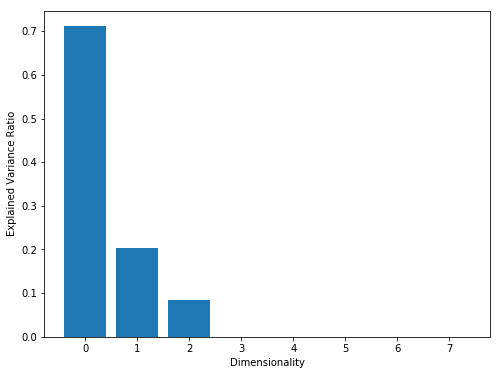

In [9]:
n=8
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_ratio_
print (pca.explained_variance_ratio_)
plt.figure(2, figsize=(8, 6))
plt.bar(np.arange(n), eigenvalues);
plt.xlabel("Dimensionality")
plt.ylabel("Explained Variance Ratio")
plt.show()

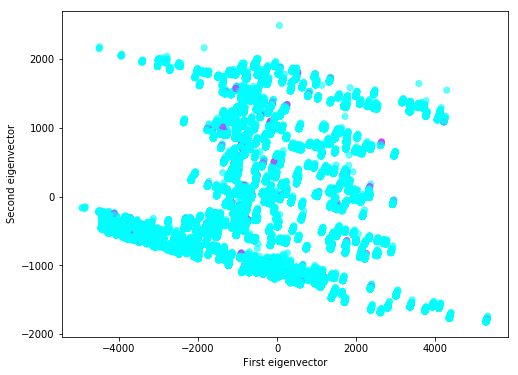

In [10]:
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, cmap=plt.cm.cool, alpha=0.6)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()

In [11]:
components_explanation = pd.DataFrame(pca.components_,columns = X.columns)
components_explanation

,timerange,day_and_hour,FHV_count,geohash_factorize,DAILYSunrise,wind_speed_average,snow_depth,temperature_min
0,0.012349,0.164216,9.863464e-01,-0.000640,-0.000458,0.000147,0.000262,-0.000836
1,0.022669,0.986117,-1.644639e-01,-0.001583,-0.002566,-0.000036,0.001201,0.000042
2,0.999667,-0.024391,-8.455119e-03,-0.000122,0.000027,-0.000015,-0.000039,-0.000172
3,0.000166,0.001652,3.697826e-04,0.999990,-0.003710,0.000694,0.001805,-0.000168
4,0.000176,0.000273,8.466986e-04,0.000546,0.026476,-0.165339,-0.094060,0.981384
5,-0.000008,-0.002815,-6.322876e-07,-0.004128,-0.844559,0.154854,0.503274,0.097113
6,0.000048,0.000524,-1.013345e-05,0.000063,0.172848,0.971842,-0.038938,0.155336
7,0.000036,0.000270,2.020829e-05,0.000383,0.506085,-0.064847,0.858107,0.057666


## logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 200)

In [14]:
lr = LogisticRegression(C=1e4)

In [15]:
lrm = lr.fit(X_train, y_train)
lrm.get_params()

{'C': 10000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
labelPred = lrm.predict(X_test)
labelPred

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
labelActual = np.array(y_test)
labelActual

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
#compare
labelPred == labelActual

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [19]:
#compute TP,FP,FN,TN for the above classification
TP = sum((labelPred==1)&(labelActual==1))
FP = sum((labelPred==1)&(labelActual==0))
FN = sum((labelPred==0)&(labelActual==1))
TN = sum((labelPred==0)&(labelActual==0))

#compute precision, accuracy and recall
Acc = 100.0 * (TP+TN)/(TP+TN+FP+FN)
Rec = 100.0 * TP/(TP+FN)
Prec= 100.0 * TP/(TP+FP)
print('Precision = %.2f%%\nAccuracy = %.2f%%\nRecall = %.2f%%'%(Prec,Acc,Rec))

Precision = 0.00%
Accuracy = 99.53%
Recall = 0.00%


In [20]:
print(confusion_matrix(labelPred, labelActual))
print('\nTP = %d, TN = %d, FP = %d, FN = %d'%(TP,TN,FP,FN))

[[37186   167]
 [    7     0]]

TP = 0, TN = 37186, FP = 7, FN = 167
